**Dados do GLP**
<br>
Como baixar os dados brutos
<br>
Link: https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp
<br>
<br>
Faça download dos período:
* 1º Semestre - 2020
* 2º Semestre - 2020
* 1º Semestre - 2021
* 2º Semestre - 2021
* 1º Semestre - 2022
* 2º Semestre - 2022
* 1º Semestre - 2023

In [52]:
# Libs
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime

# SQL
import sqlite3

# Avisos CHATOS
import warnings
warnings.filterwarnings('ignore')

# Estilo
plt.style.use('seaborn-dark')

In [53]:
Teste = pd.read_csv('glp-2020-01.csv', sep=';')
Teste.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,MG,SAO SEBASTIAO DO PARAISO,REDE DE POSTOS ZERO IV LTDA.,00.883.226/0001-88,RODOVIA BR 491 KM 03,3101,NaN,ITAMARATI,37950-000,GLP,02/01/2020,65,NaN,R$ / 13 kg,COPAGAZ
1,S,RS,SANTA MARIA,SANTA LUCIA COMERCIO E PAVIMENTACOES LTDA,87.305.868/0001-88,RODOVIA RS 509,1200,KM 03,JOÃO GOULART,97095-000,GLP,03/01/2020,80,NaN,R$ / 13 kg,ULTRAGAZ
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GLP,02/01/2020,78,"68,72",R$ / 13 kg,AMAZONGÁS
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GLP,02/01/2020,78,"68,72",R$ / 13 kg,AMAZONGÁS
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GLP,03/01/2020,82,"70,02",R$ / 13 kg,AMAZONGÁS


In [54]:
Teste.shape

(114241, 16)

In [55]:
Teste.isnull().sum().sum()

172003

In [56]:
Teste.dtypes

Regiao - Sigla       object
Estado - Sigla       object
Municipio            object
Revenda              object
CNPJ da Revenda      object
Nome da Rua          object
Numero Rua           object
Complemento          object
Bairro               object
Cep                  object
Produto              object
Data da Coleta       object
Valor de Venda       object
Valor de Compra      object
Unidade de Medida    object
Bandeira             object
dtype: object

In [57]:
Teste['Regiao - Sigla'].unique()

array(['SE', 'S', 'N', 'NE', 'CO'], dtype=object)

In [58]:
# Amostra dos dados
Linhas = Teste.shape[0]
Colunas = Teste.shape[1]

Valores_Nulos = Teste.isnull().sum()
Total_Nulos = Valores_Nulos.sum()
Colunas_Nulas = Valores_Nulos[ Valores_Nulos > 0  ].index

Tipos_Campos = Teste.dtypes

Regioes = Teste['Regiao - Sigla'].unique()
Estados = Teste['Estado - Sigla'].unique()

Dicionario = {
    'Total de Registros' : Linhas,
    'Totla de Colunas' : Colunas,
    'Total_Linhas_Nulas' : Total_Nulos,
     'Colunas_Nulas' : [ Colunas_Nulas ],
     'Tipo_Campos' : [Tipos_Campos],
    'Estatistica_Regiao' : [Regioes],
    'Estatistica_Estados' : [Estados]
}

pd.DataFrame( Dicionario, index=[0] )

,Total de Registros,Totla de Colunas,Total_Linhas_Nulas,Colunas_Nulas,Tipo_Campos,Estatistica_Regiao,Estatistica_Estados
0,114241,16,172003,"Index(['Numero Rua', 'Complemento', 'Valor de ...",Regiao - Sigla object Estado - Sigla ...,"[SE, S, N, NE, CO]","[MG, RS, AC, AL, AM, BA, DF, ES, GO, MA, MS, M..."


In [59]:
def Validar_Arquivo( Base_Dados, Nome_Arquivo):

  '''
  Função irá verifiicar algumas estatisticas da ingestão dos dados
  '''

  Linhas = Base_Dados.shape[0]
  Colunas = Base_Dados.shape[1]

  Valores_Nulos = Base_Dados.isnull().sum()
  Total_Nulos = Valores_Nulos.sum()
  Colunas_Nulas = Valores_Nulos[ Valores_Nulos > 0  ].index

  Tipos_Campos = Base_Dados.dtypes

  Regioes = Base_Dados['Regiao - Sigla'].unique()
  Estados = Base_Dados['Estado - Sigla'].unique()

  Nome_Arquivo = str(Nome_Arquivo)
  Data = datetime.datetime.now().date()
  Hora = datetime.datetime.now().time()

  Dicionario = {
    'Total de Registros' : Linhas,
    'Totla de Colunas' : Colunas,
    'Total_Linhas_Nulas' : Total_Nulos,
     'Colunas_Nulas' : [ Colunas_Nulas ],
     'Tipo_Campos' : [Tipos_Campos],
    'Estatistica_Regiao' : [Regioes],
    'Estatistica_Estados' : [Estados],
    'Nome_Arquivo' : Nome_Arquivo,
    'Data' : Data,
    'Hora' : Hora
  }

  Log = pd.DataFrame( Dicionario, index=[0] )

  return Log

In [60]:
datetime.datetime.now().date()

datetime.date(2023, 11, 20)

## **Tratemento + Ingestão**

Nessa etapa:
1. Ler cada arquivo e empilhar em um único arquivo
2. Criar um banco de dados e uma tabela usando SQL
3. Levar os dados para o banco de dados

In [61]:
# Estrutura para consolidar os arquivo Baixados

# Local para Buscar os arquivos Baixados
Local = '/content/'

# Variaveiis de apoio
Base_Consolidada = pd.DataFrame()
Base_Log = pd.DataFrame()

# Loop para percorrer o diretorio
for Diretorio, Subpastas, Arquivos in os.walk( Local ):

  #print(Diretorio, Subpastas, Arquivos)
  for Arquivo in Arquivos:

    if '.csv' in Arquivo and 'glp' in Arquivo:

      # Empilhando os dados
      Base = pd.read_csv( Local + f'{Arquivo}', sep=';' )
      Base_Consolidada = pd.concat( [Base_Consolidada, Base] )

      # Log
      Base_Log = pd.concat([Base_Log, Validar_Arquivo(Base, Arquivo ) ])

    else:
      pass

In [62]:
Base_Log

,Total de Registros,Totla de Colunas,Total_Linhas_Nulas,Colunas_Nulas,Tipo_Campos,Estatistica_Regiao,Estatistica_Estados,Nome_Arquivo,Data,Hora
0,89372,16,157691,"Index(['Numero Rua', 'Complemento', 'Bairro', ...",Regiao - Sigla object Estado - Sigla ...,"[NE, S, SE, CO, N]","[CE, SC, MA, SP, PB, RS, PR, PE, RJ, GO, MT, R...",glp-2021-02.csv,2023-11-20,15:11:01.784880
0,100133,16,176302,"Index(['Numero Rua', 'Complemento', 'Bairro', ...",Regiao - Sigla object Estado - Sigla ...,"[SE, N, NE, S, CO]","[SP, AC, CE, MA, PA, RS, PR, GO, MG, PB, TO, B...",glp-2022-01.csv,2023-11-20,15:11:02.915287
0,45412,16,73510,"Index(['Numero Rua', 'Complemento', 'Valor de ...",Regiao - Sigla object Estado - Sigla ...,"[S, N, NE, CO, SE]","[RS, AM, BA, DF, GO, MA, MS, PB, PR, SC, SP, C...",glp-2020-02.csv,2023-11-20,15:11:03.426376
0,105341,16,184286,"Index(['Complemento', 'Bairro', 'Valor de Comp...",Regiao - Sigla object Estado - Sigla ...,"[CO, S, SE, NE, N]","[MS, RS, MG, CE, BA, DF, ES, MA, PA, PB, PE, P...",glp-2023-01.csv,2023-11-20,15:11:04.267843
0,114241,16,172003,"Index(['Numero Rua', 'Complemento', 'Valor de ...",Regiao - Sigla object Estado - Sigla ...,"[SE, S, N, NE, CO]","[MG, RS, AC, AL, AM, BA, DF, ES, GO, MA, MS, M...",glp-2020-01.csv,2023-11-20,15:11:05.018565
0,60280,16,106237,"Index(['Complemento', 'Valor de Compra'], dtyp...",Regiao - Sigla object Estado - Sigla ...,"[SE, S, N, NE, CO]","[SP, RJ, RS, AC, CE, DF, MA, MG, MS, PA, PB, P...",glp-2021-01.csv,2023-11-20,15:11:05.473722
0,67371,16,118718,"Index(['Numero Rua', 'Complemento', 'Bairro', ...",Regiao - Sigla object Estado - Sigla ...,"[NE, CO, SE, S, N]","[PI, GO, MG, SP, SC, AM, PA, PB, PE, PR, RO, R...",glp-2022-02.csv,2023-11-20,15:11:05.986446


In [63]:
Base_Consolidada.shape

(582150, 16)

In [64]:
Base_Consolidada.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [65]:
# Ajustando Coluna
Base_Consolidada.columns = [ Loop.replace(' - ', '_').replace(' ', '_').lower() for Loop in Base_Consolidada.columns ]
Base_Consolidada.columns

Index(['regiao_sigla', 'estado_sigla', 'municipio', 'revenda',
       'cnpj_da_revenda', 'nome_da_rua', 'numero_rua', 'complemento', 'bairro',
       'cep', 'produto', 'data_da_coleta', 'valor_de_venda', 'valor_de_compra',
       'unidade_de_medida', 'bandeira'],
      dtype='object')

In [66]:
Base_Consolidada.data_da_coleta.dtypes

dtype('O')

In [67]:
# Ajustando Data da Coleta
Base_Consolidada.data_da_coleta = pd.to_datetime( Base_Consolidada.data_da_coleta, format='%d/%m/%Y', errors='coerce')

In [68]:
# Gerando Ano e Mes da coleta
Base_Consolidada['ano_coleto'] = Base_Consolidada.data_da_coleta.dt.year
Base_Consolidada['mes_coleto'] = Base_Consolidada.data_da_coleta.dt.month

In [69]:
Base_Consolidada.head()

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,valor_de_compra,unidade_de_medida,bandeira,ano_coleto,mes_coleto
0,NE,CE,MARACANAU,POSTO BOTO LTDA,03.020.995/0001-40,AVENIDA PADRE JOSE HOLANDA DO VALE,809,NaN,PIRATININGA,61905-000,GLP,2021-07-01,"89,99",NaN,R$ / 13 kg,NACIONAL GÁS BUTANO,2021,7
1,S,SC,JARAGUA DO SUL,POSTO CIDADE LTDA,81.352.882/0004-07,RUA WALTER MARQUARDT,2555,NaN,BARRA DO RIO MOLHA,89259-700,GLP,2021-07-01,"86,9",NaN,R$ / 13 kg,NACIONAL GÁS BUTANO,2021,7
2,NE,MA,SAO JOSE DE RIBAMAR,POSTO ATLANTICO SUL LTDA,04.034.035/0001-00,RODOVIA MA 203,20,K M,ARACAGY,65110-000,GLP,2021-07-01,"89,99",NaN,R$ / 13 kg,LIQUIGÁS,2021,7
3,SE,SP,BIRIGUI,AUTO POSTO SCUCUGLIA E OLIVEIRA LTDA,00.226.807/0001-47,RUA CONSOLACAO,140,NaN,PARQUE R PINHEIROS,16203-031,GLP,2021-07-01,85,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA,2021,7
4,SE,SP,GARCA,AUTO POSTO RANELI GARCA LTDA,72.812.795/0001-43,RUA BASILIO SELANI,45,NaN,VILA JOSE RIBEIRO,17400-000,GLP,2021-07-01,100,NaN,R$ / 13 kg,LIQUIGÁS,2021,7


In [70]:
# Conectar ao banco de dados (ele será criado se não existir)
Conexao = sqlite3.connect('db_estudos.db')

In [71]:
# Criar um cursor
cursor = Conexao.cursor()

In [72]:
# Query
Query_SQL = '''

CREATE TABLE IF NOT EXISTS tab_dados_glp_Teste (
  regiao_sigla TEXT,
  estado_sigla TEXT,
  municipio TEXT,
  revenda TEXT,
  cnpj_da_revenda TEXT,
  nome_da_rua TEXT,
  numero_rua TEXT,
  complemento TEXT,
  bairro TEXT,
  cep TEXT,
  produto TEXT,
  data_da_coleta DATETIME,
  valor_de_venda INTEGER,
  valor_de_compra INTEGER,
  unidade_de_medida TEXT,
  bandeira TEXT,
  Ano_Coleto INTEGER,
  Mes_Coleto INTEGER
)

'''

# Criando a Tabela
cursor.execute( Query_SQL )

# Salvar as alterações e fechar a conexão
Conexao.commit()
Conexao.close()

In [73]:
# Conectar ao banco de dados
conn = sqlite3.connect('db_estudos.db')

# Criar um cursor
cursor = conn.cursor()

# Consulta para listar todas as tabelas no banco de dados
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Recupere os resultados da consulta
tabelas = cursor.fetchall()

# Nomes das tabelas
for tabela in tabelas:
    print(tabela[0])

# Fechar a conexão
conn.close()

tab_dados_glp_Teste
tab_dados_glp


In [74]:
type( Base_Consolidada )

pandas.core.frame.DataFrame

In [75]:
# Conectar ao banco de dados
conn = sqlite3.connect('db_estudos.db')

# Use o método "to_sql" do Pandas para inserir os dados na tabela
Base_Consolidada.to_sql(
    'tab_dados_glp',
    conn,
    if_exists='replace',
    index=False
)

# Fechar a conexão
conn.close()

In [76]:
# Conectar ao banco de dados
conn = sqlite3.connect('db_estudos.db')

# Query
Query_SQL = '''
SELECT *
FROM tab_dados_glp
LIMIT 10
'''

pd.read_sql( Query_SQL, conn)

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,valor_de_compra,unidade_de_medida,bandeira,ano_coleto,mes_coleto
0,NE,CE,MARACANAU,POSTO BOTO LTDA,03.020.995/0001-40,AVENIDA PADRE JOSE HOLANDA DO VALE,809,None,PIRATININGA,61905-000,GLP,2021-07-01 00:00:00,"89,99",None,R$ / 13 kg,NACIONAL GÁS BUTANO,2021,7
1,S,SC,JARAGUA DO SUL,POSTO CIDADE LTDA,81.352.882/0004-07,RUA WALTER MARQUARDT,2555,None,BARRA DO RIO MOLHA,89259-700,GLP,2021-07-01 00:00:00,"86,9",None,R$ / 13 kg,NACIONAL GÁS BUTANO,2021,7
2,NE,MA,SAO JOSE DE RIBAMAR,POSTO ATLANTICO SUL LTDA,04.034.035/0001-00,RODOVIA MA 203,20,K M,ARACAGY,65110-000,GLP,2021-07-01 00:00:00,"89,99",None,R$ / 13 kg,LIQUIGÁS,2021,7
3,SE,SP,BIRIGUI,AUTO POSTO SCUCUGLIA E OLIVEIRA LTDA,00.226.807/0001-47,RUA CONSOLACAO,140,None,PARQUE R PINHEIROS,16203-031,GLP,2021-07-01 00:00:00,85,None,R$ / 13 kg,SUPERGASBRAS ENERGIA,2021,7
4,SE,SP,GARCA,AUTO POSTO RANELI GARCA LTDA,72.812.795/0001-43,RUA BASILIO SELANI,45,None,VILA JOSE RIBEIRO,17400-000,GLP,2021-07-01 00:00:00,100,None,R$ / 13 kg,LIQUIGÁS,2021,7
5,NE,PB,JOAO PESSOA,COMÉRCIO DE GÁS MANDACARU LTDA,00.698.039/0001-24,RUA JOÃO DE BRITO L. MOURA,65,None,MANDACARU,58027-070,GLP,2021-07-01 00:00:00,95,None,R$ / 13 kg,NACIONAL GÁS BUTANO,2021,7
6,S,RS,SANTANA DO LIVRAMENTO,IRMÃOS RIBEIRO BÊNIA LTDA.,01.550.635/0002-06,AVENIDA PAUL HARRIS,262,None,CENTRO,97574-360,GLP,2021-07-01 00:00:00,84,None,R$ / 13 kg,SUPERGASBRAS ENERGIA,2021,7
7,S,PR,MARINGA,VALTER ORCEZE & CIA LTDA,01.769.471/0001-21,AVENIDA DR. ALEXANDRE RASGULAEFF,3389,None,CIDADE NOVA,87023-060,GLP,2021-07-01 00:00:00,95,None,R$ / 13 kg,SUPERGASBRAS ENERGIA,2021,7
8,SE,SP,LIMEIRA,FABIO JOSE DOS SANTOS LIMEIRA ME,01.840.071/0001-65,AVENIDA ARMANDO PACHECO BARROS,410,None,JD. SÃO JOÃO,13482-117,GLP,2021-07-01 00:00:00,87,None,R$ / 13 kg,BRANCA,2021,7
9,NE,PE,RECIFE,RIT COMERCIO DE GAS GLP LTDA,01.949.949/0004-48,RUA JERONIMO VILELA,773,None,CAMPO GRANDE,52040-180,GLP,2021-07-01 00:00:00,80,None,R$ / 13 kg,LIQUIGÁS,2021,7


## Análise Exploratória

In [77]:
# Conectar ao banco de dados
conn = sqlite3.connect('db_estudos.db')

# Query
Query_SQL = '''
SELECT *
FROM Tab_dados_glp
'''

# Ler pelo pandas
Base_Dados = pd.read_sql(Query_SQL, conn)

# Fechar a conexão
conn.close()

In [78]:
Base_Dados.head()

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,valor_de_compra,unidade_de_medida,bandeira,ano_coleto,mes_coleto
0,NE,CE,MARACANAU,POSTO BOTO LTDA,03.020.995/0001-40,AVENIDA PADRE JOSE HOLANDA DO VALE,809,None,PIRATININGA,61905-000,GLP,2021-07-01 00:00:00,"89,99",None,R$ / 13 kg,NACIONAL GÁS BUTANO,2021,7
1,S,SC,JARAGUA DO SUL,POSTO CIDADE LTDA,81.352.882/0004-07,RUA WALTER MARQUARDT,2555,None,BARRA DO RIO MOLHA,89259-700,GLP,2021-07-01 00:00:00,"86,9",None,R$ / 13 kg,NACIONAL GÁS BUTANO,2021,7
2,NE,MA,SAO JOSE DE RIBAMAR,POSTO ATLANTICO SUL LTDA,04.034.035/0001-00,RODOVIA MA 203,20,K M,ARACAGY,65110-000,GLP,2021-07-01 00:00:00,"89,99",None,R$ / 13 kg,LIQUIGÁS,2021,7
3,SE,SP,BIRIGUI,AUTO POSTO SCUCUGLIA E OLIVEIRA LTDA,00.226.807/0001-47,RUA CONSOLACAO,140,None,PARQUE R PINHEIROS,16203-031,GLP,2021-07-01 00:00:00,85,None,R$ / 13 kg,SUPERGASBRAS ENERGIA,2021,7
4,SE,SP,GARCA,AUTO POSTO RANELI GARCA LTDA,72.812.795/0001-43,RUA BASILIO SELANI,45,None,VILA JOSE RIBEIRO,17400-000,GLP,2021-07-01 00:00:00,100,None,R$ / 13 kg,LIQUIGÁS,2021,7


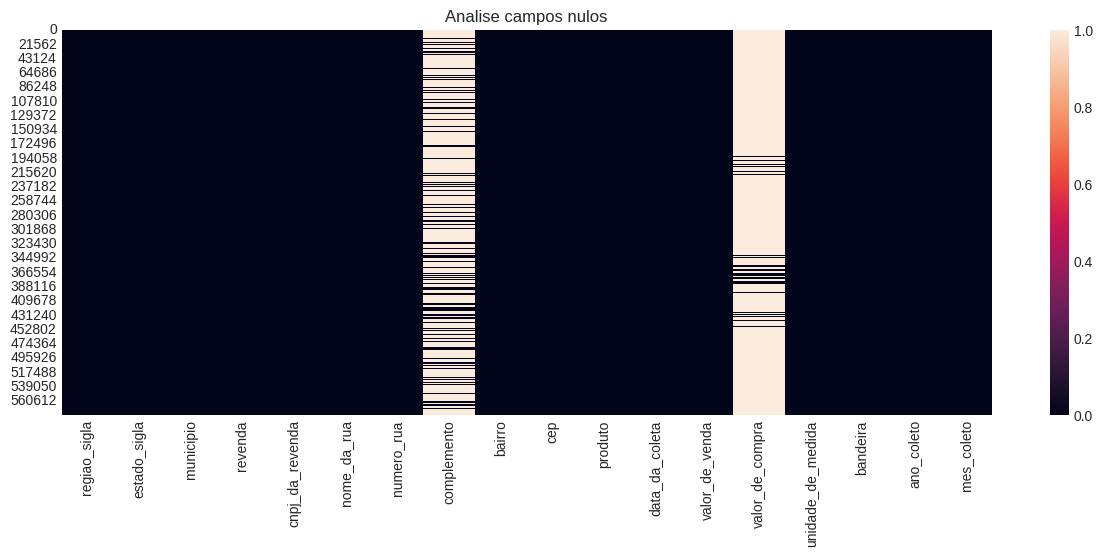

In [79]:
# Campos nulos
plt.figure( figsize=(15, 5 ) )
plt.title('Analise campos nulos')
sns.heatmap( Base_Dados.isnull() );

In [80]:
# Tipos dos campos
Base_Dados.dtypes

regiao_sigla         object
estado_sigla         object
municipio            object
revenda              object
cnpj_da_revenda      object
nome_da_rua          object
numero_rua           object
complemento          object
bairro               object
cep                  object
produto              object
data_da_coleta       object
valor_de_venda       object
valor_de_compra      object
unidade_de_medida    object
bandeira             object
ano_coleto            int64
mes_coleto            int64
dtype: object

In [81]:
Base_Dados.valor_de_venda = Base_Dados.valor_de_venda.apply( lambda Loop : Loop.replace(',', '.') )
Base_Dados.valor_de_venda = pd.to_numeric( Base_Dados.valor_de_venda )

In [82]:
Base_Dados.valor_de_venda.dtypes

dtype('float64')

In [83]:
Base_Dados.valor_de_venda.describe()

count    582150.000000
mean         94.902217
std          19.242097
min          49.900000
25%          78.000000
50%          98.000000
75%         110.000000
max         160.000000
Name: valor_de_venda, dtype: float64

**Regra do preço mensal**
* Vamos consilidar a média do mês

**Desvio Padrão** <br>
<p>
O desvio padrão é uma medida estatística que quantifica a dispersão ou variabilidade dos dados em um conjunto de dados.
</p>
<p>
Ele indica o quanto os valores em um conjunto de dados estão dispersos ou afastados da média (valor médio). Em outras palavras, o desvio padrão fornece uma medida de quão "espalhados" os dados estão ao redor da média.
</p>

In [84]:
Base_Dados.columns

Index(['regiao_sigla', 'estado_sigla', 'municipio', 'revenda',
       'cnpj_da_revenda', 'nome_da_rua', 'numero_rua', 'complemento', 'bairro',
       'cep', 'produto', 'data_da_coleta', 'valor_de_venda', 'valor_de_compra',
       'unidade_de_medida', 'bandeira', 'ano_coleto', 'mes_coleto'],
      dtype='object')

In [85]:
Base_Dados.groupby(
    by=['ano_coleto', 'mes_coleto']
).agg(
    Quantidade = ('valor_de_venda', 'count'),
    Media = ('valor_de_venda', 'mean'),
    Mediana = ('valor_de_venda', 'median'),
    DesvP = ('valor_de_venda', 'std'),
).reset_index()

,ano_coleto,mes_coleto,Quantidade,Media,Mediana,DesvP
0,2020,1,20793,70.626936,70.000,8.021403
1,2020,2,17477,70.789624,70.000,7.970337
2,2020,3,19492,70.843771,70.000,7.901932
3,2020,4,19240,70.855663,70.000,7.551256
4,2020,5,17427,70.471334,70.000,7.422980
5,2020,6,19812,70.581333,70.000,7.589573
6,2020,7,19378,70.805588,70.000,7.434778
7,2020,8,12463,71.045171,70.000,7.642308
8,2020,10,1392,74.971385,75.000,8.570577
9,2020,11,4801,75.240802,75.000,8.290593


**Assimetria**

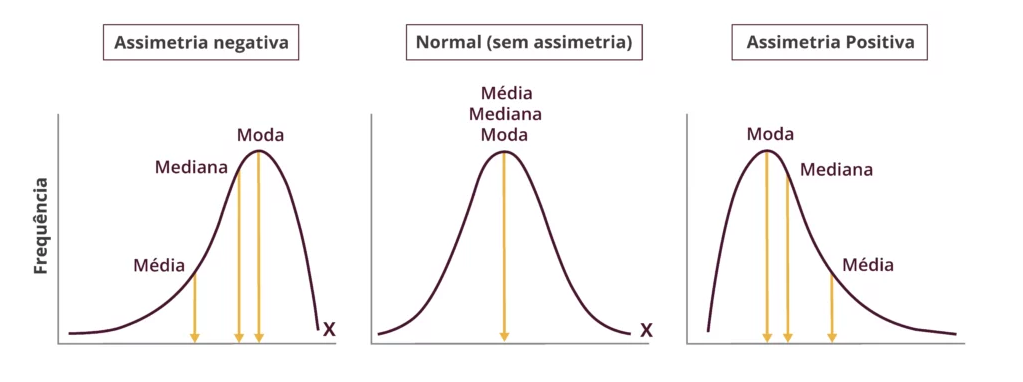

**Em termos práticos:**

1. Quando a **assimetria é igual a 0**, a distribuição é considerada simétrica, o que significa que os valores estão igualmente distribuídos ao redor da média, e não há inclinação para a direita ou para a esquerda.

2. Uma **assimetria negativa (menor que 0)** indica que a cauda da distribuição está mais longa à esquerda em comparação com a direita. Em outras palavras, a distribuição se estende mais para valores menores do que para valores maiores em relação à média.

3. Uma **assimetria positiva (maior que 0)** indicaria o oposto, ou seja, que a cauda da distribuição estaria mais longa à direita em comparação com a esquerda.

_______________________

Os benefícios de ter uma distribuição normal ou aproximadamente normal incluem:

1. **Facilidade de análise estatística**: Muitos métodos estatísticos e testes de hipóteses assumem que os dados seguem uma distribuição normal. Quando os dados se aproximam dessa distribuição, esses métodos podem ser aplicados com mais confiança e precisão.

2. **Interpretação intuitiva**: Distribuições normais são bem compreendidas e têm propriedades matemáticas bem estabelecidas, como a regra empírica (68-95-99.7), que descreve a proporção de dados dentro de determinados intervalos de desvio padrão da média.

3. **Facilita a previsão**: Muitos modelos estatísticos e de machine learning assumem que os erros seguem uma distribuição normal. Quando os erros são normalmente distribuídos, os modelos podem fazer previsões mais precisas.

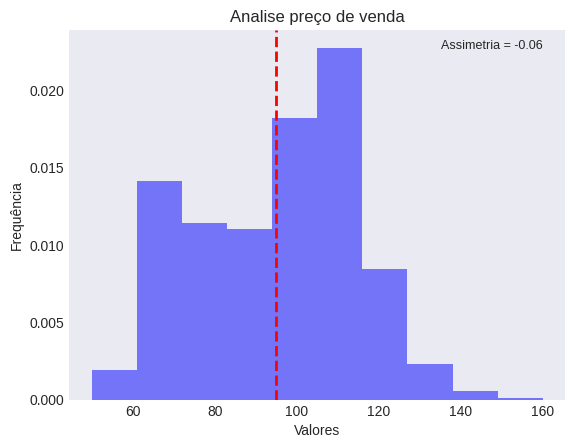

In [86]:
# Criar um histograma
plt.title('Analise preço de venda')

# Plot
plt.hist( Base_Dados['valor_de_venda'], bins=10, density=True, alpha=0.5, color='b')

# Adicionar um media
Media_Preco = Base_Dados['valor_de_venda'].mean()
plt.axvline( Media_Preco, color='red', linestyle='dashed', linewidth=2, label='média' )

# Assimetria
Assimetria = Base_Dados['valor_de_venda'].skew()
plt.annotate( f'Assimetria = {Assimetria:.2f}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=9 )

plt.xlabel('Valores')
plt.ylabel('Frequência');

In [87]:
# Serie temporal
Anl_Serie = Base_Dados.groupby(
     by=['ano_coleto', 'mes_coleto']
).agg(
    Media = ('valor_de_venda', 'mean')
).reset_index()

Anl_Serie.head()

,ano_coleto,mes_coleto,Media
0,2020,1,70.626936
1,2020,2,70.789624
2,2020,3,70.843771
3,2020,4,70.855663
4,2020,5,70.471334


In [88]:
Anl_Serie['Periodo'] = Anl_Serie['ano_coleto'].astype('str') + '-' + Anl_Serie['mes_coleto'].astype('str') + '-' + '01'
Anl_Serie['Periodo'] =  pd.to_datetime( Anl_Serie['Periodo'] )
Anl_Serie.set_index('Periodo', inplace=True )

Anl_Serie.head()

,ano_coleto,mes_coleto,Media
Periodo,,,
2020-01-01,2020,1,70.626936
2020-02-01,2020,2,70.789624
2020-03-01,2020,3,70.843771
2020-04-01,2020,4,70.855663
2020-05-01,2020,5,70.471334


In [89]:
# Gestãoo do Ministro da Fazendo
Anl_Serie['Gestão'] = Anl_Serie['ano_coleto'].apply( lambda Loop: 'Paulo Guedes' if Loop < 2023 else 'Fernando Haddad' )
Anl_Serie.head()

,ano_coleto,mes_coleto,Media,Gestão
Periodo,,,,
2020-01-01,2020,1,70.626936,Paulo Guedes
2020-02-01,2020,2,70.789624,Paulo Guedes
2020-03-01,2020,3,70.843771,Paulo Guedes
2020-04-01,2020,4,70.855663,Paulo Guedes
2020-05-01,2020,5,70.471334,Paulo Guedes


In [90]:
Anl_Serie.tail()

,ano_coleto,mes_coleto,Media,Gestão
Periodo,,,,
2023-02-01,2023,2,108.813096,Fernando Haddad
2023-03-01,2023,3,108.221444,Fernando Haddad
2023-04-01,2023,4,108.327441,Fernando Haddad
2023-05-01,2023,5,108.425949,Fernando Haddad
2023-06-01,2023,6,104.475325,Fernando Haddad


In [91]:
Anl_Serie['Oscilação'] = (( Anl_Serie.Media / Anl_Serie.Media.shift(1) ) - 1) * 100

Anl_Serie.head()

,ano_coleto,mes_coleto,Media,Gestão,Oscilação
Periodo,,,,,
2020-01-01,2020,1,70.626936,Paulo Guedes,NaN
2020-02-01,2020,2,70.789624,Paulo Guedes,0.230347
2020-03-01,2020,3,70.843771,Paulo Guedes,0.076490
2020-04-01,2020,4,70.855663,Paulo Guedes,0.016786
2020-05-01,2020,5,70.471334,Paulo Guedes,-0.542410


**Dados da Inflação do Brasil**
<br>
https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?t=series-historicas&utm_source=landing&utm_medium=explica&utm_campaign=inflacao#plano-real-mes

In [92]:
Dados_Inflacao = pd.read_excel('Base_Inflacao.xlsx')
Dados_Inflacao.head()

,Periodo,No_Mes,3_Meses,6_Meses,Ano,12_Meses
0,2019-01-01,0.32,0.26,1.10,0.32,3.78
1,2019-02-01,0.43,0.90,1.63,0.75,3.89
2,2019-03-01,0.75,1.51,1.90,1.51,4.58
3,2019-04-01,0.57,1.76,2.02,2.09,4.94
4,2019-05-01,0.13,1.46,2.37,2.22,4.66


In [93]:
Anl_Serie = pd.merge(  Anl_Serie.reset_index(), Dados_Inflacao, on='Periodo', how='left' )
Anl_Serie.head()

,Periodo,ano_coleto,mes_coleto,Media,Gestão,Oscilação,No_Mes,3_Meses,6_Meses,Ano,12_Meses
0,2020-01-01,2020,1,70.626936,Paulo Guedes,NaN,0.21,1.88,2.05,0.21,4.19
1,2020-02-01,2020,2,70.789624,Paulo Guedes,0.230347,0.25,1.62,2.20,0.46,4.01
2,2020-03-01,2020,3,70.843771,Paulo Guedes,0.076490,0.07,0.53,2.31,0.53,3.30
3,2020-04-01,2020,4,70.855663,Paulo Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40
4,2020-05-01,2020,5,70.471334,Paulo Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88


**Dados do Dolar** <br>
https://www.aasp.org.br/suporte-profissional/indices-economicos/mensal/dolar/

In [94]:
Dados_Dolar = pd.read_excel('Base_Dolar.xlsx')
Dados_Dolar.head()

,Periodo,Dolar
0,2019-01-01,3.9090
1,2019-02-01,3.7049
2,2019-03-01,3.7155
3,2019-04-01,3.8344
4,2019-05-01,3.8730


In [95]:
# cruzando com os dados de inflação
Anl_Serie = pd.merge( Anl_Serie.reset_index(), Dados_Dolar, on='Periodo', how='left')
Anl_Serie.head()

,index,Periodo,ano_coleto,mes_coleto,Media,Gestão,Oscilação,No_Mes,3_Meses,6_Meses,Ano,12_Meses,Dolar
0,0,2020-01-01,2020,1,70.626936,Paulo Guedes,NaN,0.21,1.88,2.05,0.21,4.19,4.0949
1,1,2020-02-01,2020,2,70.789624,Paulo Guedes,0.230347,0.25,1.62,2.20,0.46,4.01,4.1622
2,2,2020-03-01,2020,3,70.843771,Paulo Guedes,0.076490,0.07,0.53,2.31,0.53,3.30,4.3163
3,3,2020-04-01,2020,4,70.855663,Paulo Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40,4.7362
4,4,2020-05-01,2020,5,70.471334,Paulo Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88,5.2579


**Petróleo Brent Futuros Dados Históricos**
<br>
https://br.investing.com/commodities/brent-oil-historical-data

In [96]:
Dados_Petroleo = pd.read_excel('Base_Petroleo.xlsx')
Dados_Petroleo.head()

,Periodo,Indice_Brent
0,2023-06-01,74.90
1,2023-05-01,72.66
2,2023-04-01,79.54
3,2023-03-01,79.77
4,2023-02-01,83.89


In [97]:
# cruzando com os dados de inflação
Anl_Serie = pd.merge( Anl_Serie.reset_index(), Dados_Petroleo, on='Periodo', how='left')
Anl_Serie.head()

,level_0,index,Periodo,ano_coleto,mes_coleto,Media,Gestão,Oscilação,No_Mes,3_Meses,6_Meses,Ano,12_Meses,Dolar,Indice_Brent
0,0,0,2020-01-01,2020,1,70.626936,Paulo Guedes,NaN,0.21,1.88,2.05,0.21,4.19,4.0949,58.16
1,1,1,2020-02-01,2020,2,70.789624,Paulo Guedes,0.230347,0.25,1.62,2.20,0.46,4.01,4.1622,50.52
2,2,2,2020-03-01,2020,3,70.843771,Paulo Guedes,0.076490,0.07,0.53,2.31,0.53,3.30,4.3163,22.74
3,3,3,2020-04-01,2020,4,70.855663,Paulo Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40,4.7362,25.27
4,4,4,2020-05-01,2020,5,70.471334,Paulo Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88,5.2579,35.33


In [98]:
# Excluir colunas
Anl_Serie.drop( columns=['level_0', 'index'], inplace=True )

Anl_Serie.set_index('Periodo', inplace=True)

Anl_Serie.head()

,ano_coleto,mes_coleto,Media,Gestão,Oscilação,No_Mes,3_Meses,6_Meses,Ano,12_Meses,Dolar,Indice_Brent
Periodo,,,,,,,,,,,,
2020-01-01,2020,1,70.626936,Paulo Guedes,NaN,0.21,1.88,2.05,0.21,4.19,4.0949,58.16
2020-02-01,2020,2,70.789624,Paulo Guedes,0.230347,0.25,1.62,2.20,0.46,4.01,4.1622,50.52
2020-03-01,2020,3,70.843771,Paulo Guedes,0.076490,0.07,0.53,2.31,0.53,3.30,4.3163,22.74
2020-04-01,2020,4,70.855663,Paulo Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40,4.7362,25.27
2020-05-01,2020,5,70.471334,Paulo Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88,5.2579,35.33


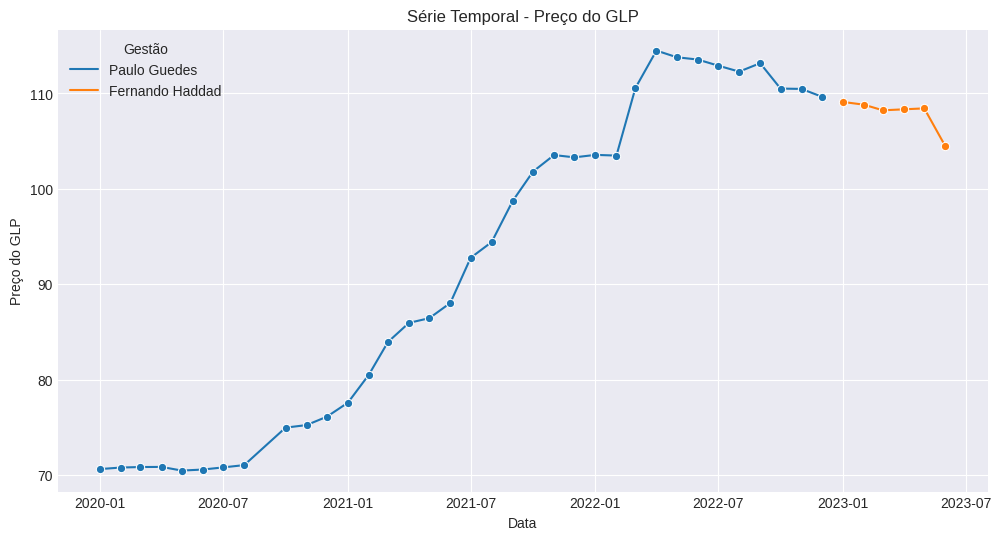

In [99]:
# Serie Temporal
plt.figure( figsize=(12, 6) )
sns.lineplot(
    data=Anl_Serie.reset_index(),
    x='Periodo', y='Media',
    hue='Gestão', marker='o', linestyle='-')

plt.title('Série Temporal - Preço do GLP')
plt.xlabel('Data')
plt.ylabel('Preço do GLP')

plt.grid(True)

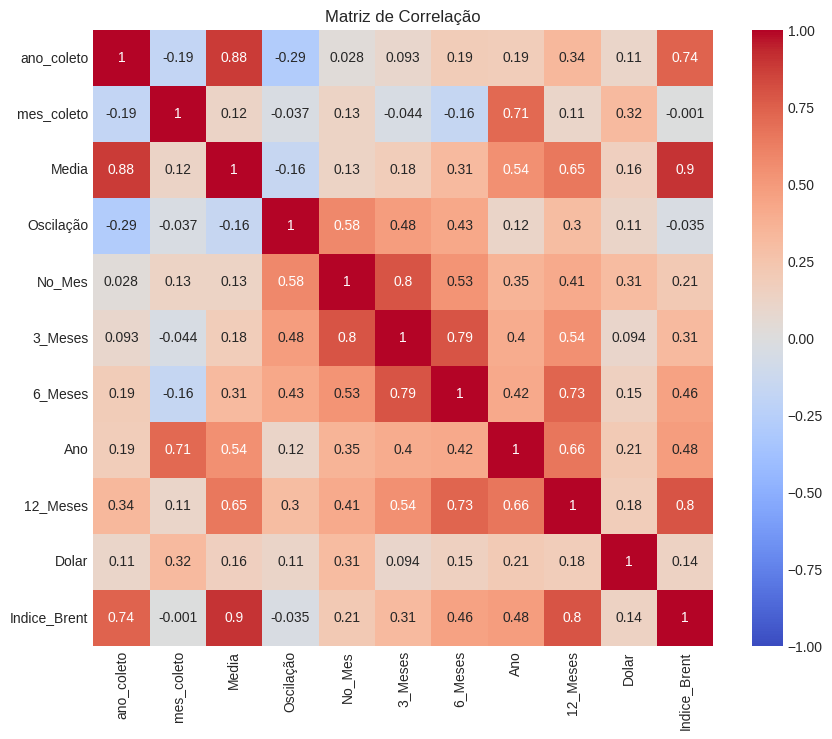

In [100]:
# Anl de Correação
correlation_matrix = Anl_Serie.corr()

# Plot
plt.figure( figsize=(10, 8) )
sns.heatmap( correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação');

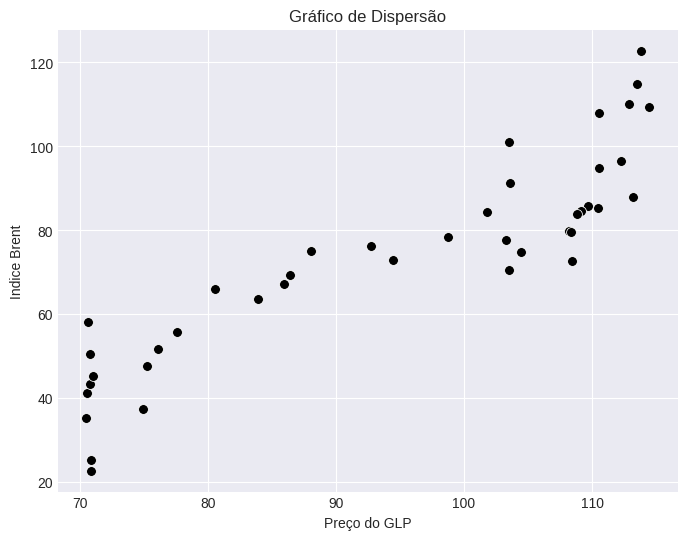

In [101]:
# GLP + Brent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Anl_Serie, x='Media', y='Indice_Brent', color='black', marker='o', s=50)
plt.title('Gráfico de Dispersão')
plt.xlabel('Preço do GLP')
plt.ylabel('Indice Brent')
plt.grid(True)

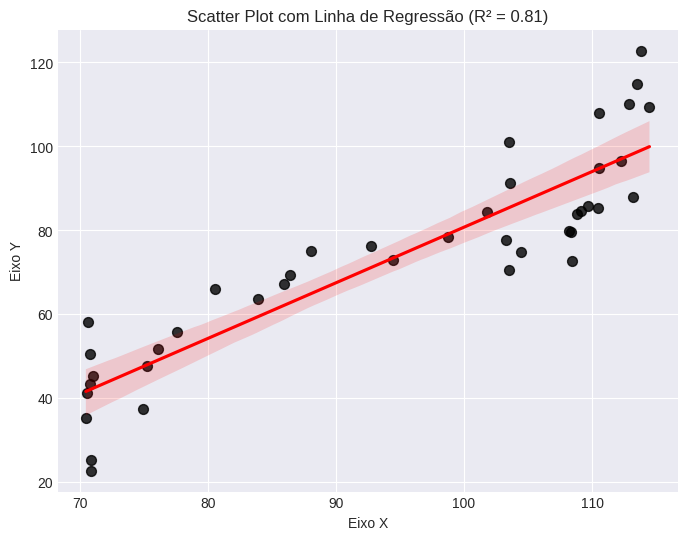

In [102]:
# Gráfico de dispersão + Linha da Regressão + r²

# Libs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Treinar uma regressão
x = Anl_Serie['Indice_Brent'].values.reshape(-1, 1)
y = Anl_Serie['Media'].values.reshape(-1, 1)

# Treinao da Regressão
Regressor = LinearRegression()
Regressor.fit(x, y)

# Calcule o coeficiente de determinação (R²)
y_pred = Regressor.predict(x)
r2 = r2_score(y, y_pred)

# Tamanho da Imagem
plt.figure(figsize=(8, 6))

# Plot
sns.regplot(
    data=Anl_Serie, x='Media', y='Indice_Brent', color='black',
    scatter_kws={'s': 50}, line_kws={'color': 'red'} )

plt.title(f'Scatter Plot com Linha de Regressão (R² = {r2:.2f})')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)

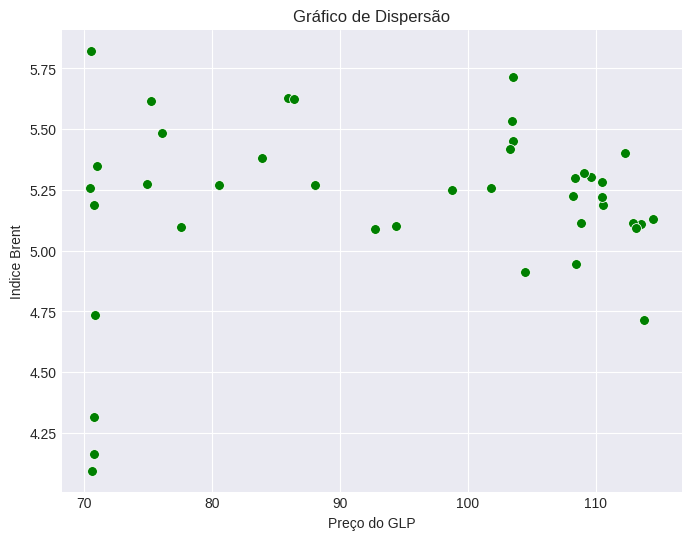

In [103]:
# GLP x Dólar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Anl_Serie, x='Media', y='Dolar', color='green', marker='o', s=50)
plt.title('Gráfico de Dispersão')
plt.xlabel('Preço do GLP')
plt.ylabel('Indice Brent')
plt.grid(True)

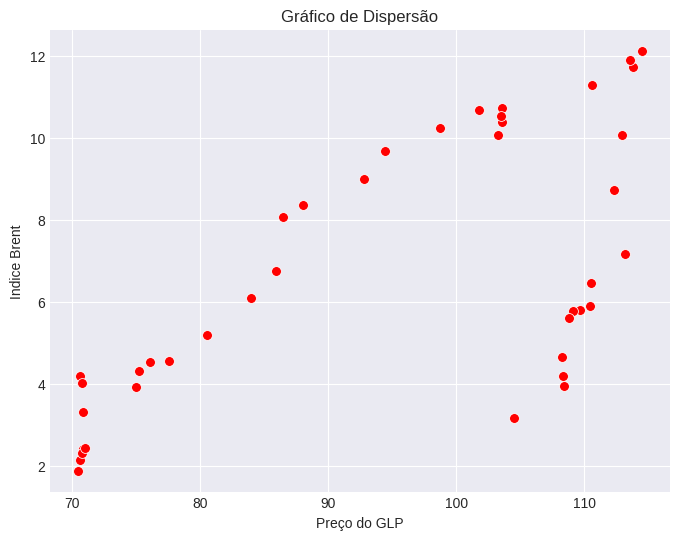

In [104]:
# GLP x IPCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Anl_Serie, x='Media', y='12_Meses', color='red', marker='o', s=50)
plt.title('Gráfico de Dispersão')
plt.xlabel('Preço do GLP')
plt.ylabel('Indice Brent')
plt.grid(True)

In [105]:
# Analisar o aumento do preço desde 2020
Anl_Serie['Aumento_Preco'] = Anl_Serie.Media - Anl_Serie.Media[0]
Anl_Serie['Ano_Mes'] = Anl_Serie['ano_coleto'].astype('str').apply(lambda Loop: Loop[2:4]) + '-' + Anl_Serie['mes_coleto'].astype('str')

Anl_Serie.head()

,ano_coleto,mes_coleto,Media,Gestão,Oscilação,No_Mes,3_Meses,6_Meses,Ano,12_Meses,Dolar,Indice_Brent,Aumento_Preco,Ano_Mes
Periodo,,,,,,,,,,,,,,
2020-01-01,2020,1,70.626936,Paulo Guedes,NaN,0.21,1.88,2.05,0.21,4.19,4.0949,58.16,0.000000,20-1
2020-02-01,2020,2,70.789624,Paulo Guedes,0.230347,0.25,1.62,2.20,0.46,4.01,4.1622,50.52,0.162687,20-2
2020-03-01,2020,3,70.843771,Paulo Guedes,0.076490,0.07,0.53,2.31,0.53,3.30,4.3163,22.74,0.216834,20-3
2020-04-01,2020,4,70.855663,Paulo Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40,4.7362,25.27,0.228726,20-4
2020-05-01,2020,5,70.471334,Paulo Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88,5.2579,35.33,-0.155602,20-5


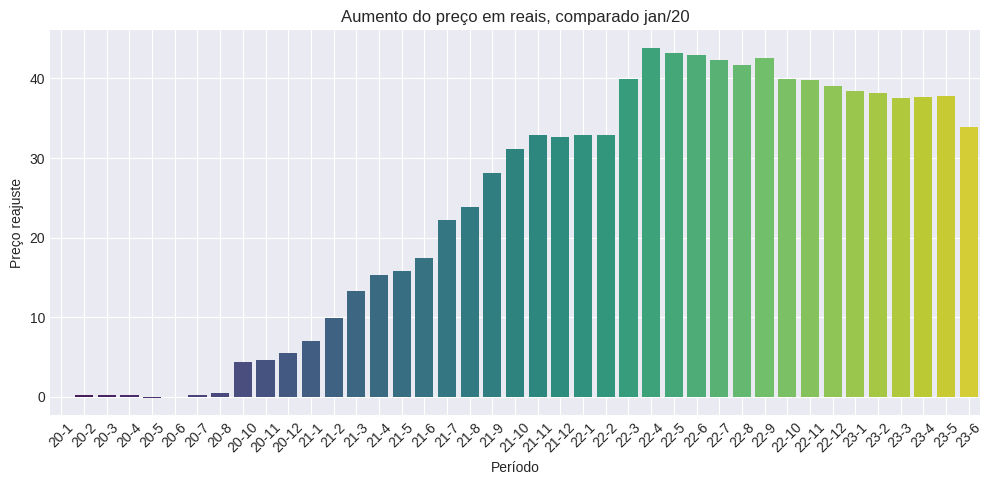

In [106]:
# Serie Temporal
plt.figure( figsize=(12, 5) )
sns.barplot(data=Anl_Serie.reset_index(), x='Ano_Mes', y='Aumento_Preco', palette='viridis')
plt.title('Aumento do preço em reais, comparado jan/20')
plt.xlabel('Período')
plt.ylabel('Preço reajuste')
plt.xticks(rotation=45)
plt.grid(True)

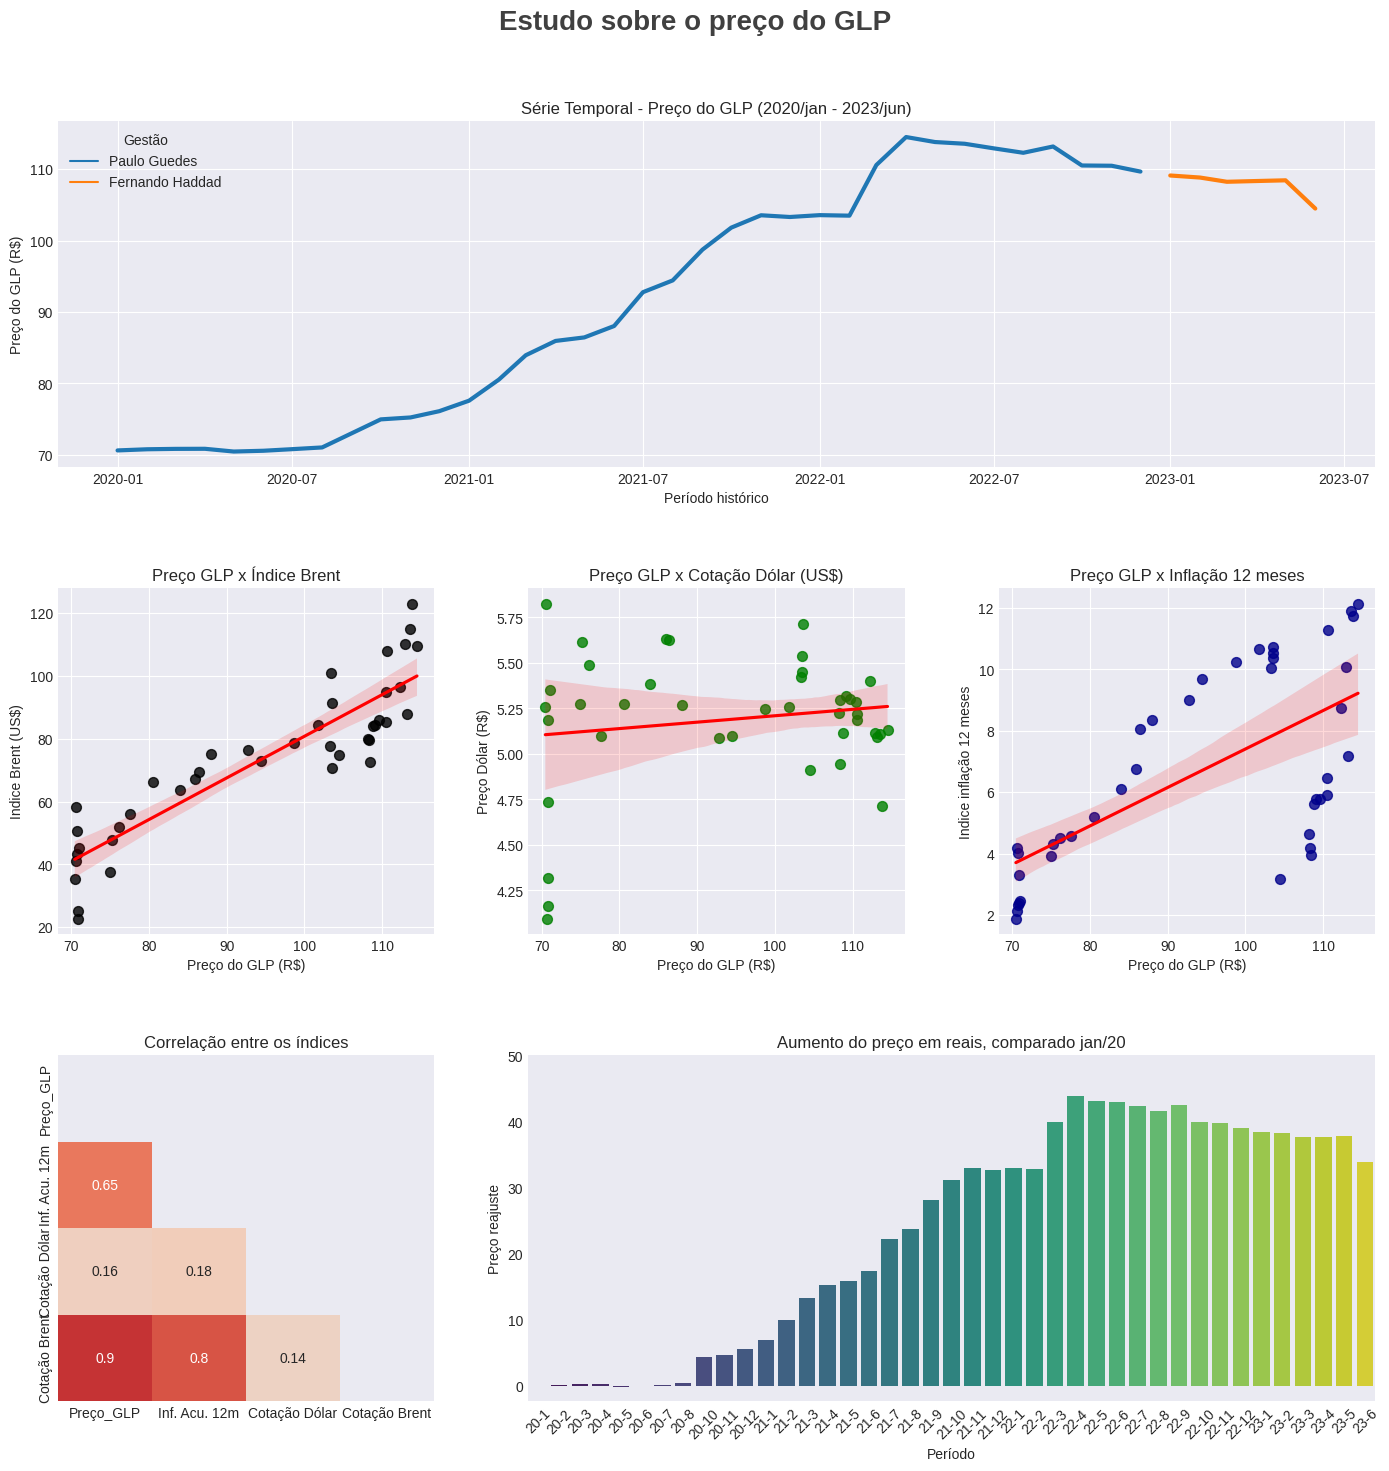

In [108]:
Produto = plt.figure( figsize=(17, 16) ) # initialize figure

# Titulo da figura
plt.suptitle('Estudo sobre o preço do GLP', fontsize=20, color='#404040', fontweight=600 )

# Lista com os eixos
Eixos = [ None for Loop in range(6) ]

# 3 linhas 3 colunas
Estrutura_Grid = (3, 3)

Eixos[0] = plt.subplot2grid( Estrutura_Grid, (0, 0), colspan=3 )
sns.lineplot(
    data=Anl_Serie.reset_index(), x='Periodo', y='Media',
    hue='Gestão', linestyle='-', linewidth=3)
plt.title('Série Temporal - Preço do GLP (2020/jan - 2023/jun)')
plt.xlabel('Período histórico')
plt.ylabel('Preço do GLP (R$)')
plt.grid(True)


Eixos[1] = plt.subplot2grid( Estrutura_Grid, (1,0), colspan=1 )
sns.regplot(  data=Anl_Serie, x='Media', y='Indice_Brent', color='black', scatter_kws={'s': 50}, line_kws={'color': 'red'} )
plt.title('Preço GLP x Índice Brent')
plt.xlabel('Preço do GLP (R$)')
plt.ylabel('Indice Brent (US$)')
plt.grid(True)

Eixos[2] = plt.subplot2grid( Estrutura_Grid, (1,1), colspan=1 )
sns.regplot( data=Anl_Serie, x='Media', y='Dolar', color='green', scatter_kws={'s': 50}, line_kws={'color': 'red'} )
plt.title('Preço GLP x Cotação Dólar (US$)')
plt.xlabel('Preço do GLP (R$)')
plt.ylabel('Preço Dólar (R$)')
plt.grid(True)

Eixos[3] = plt.subplot2grid( Estrutura_Grid, (1,2), colspan=1 )
sns.regplot( data=Anl_Serie, x='Media', y='12_Meses', color='darkblue', scatter_kws={'s': 50}, line_kws={'color': 'red'} )
plt.title('Preço GLP x Inflação 12 meses')
plt.xlabel('Preço do GLP (R$)')
plt.ylabel('Indice inflação 12 meses')
plt.grid(True)

Eixos[4] = plt.subplot2grid( Estrutura_Grid, (2,0), colspan=1 )
correlation_matrix = Anl_Serie[['Media', '12_Meses','Dolar', 'Indice_Brent']]
correlation_matrix.columns = ['Preço_GLP', 'Inf. Acu. 12m', 'Cotação Dólar', 'Cotação Brent']
correlation_matrix = correlation_matrix.corr()
mask = np.triu(correlation_matrix)
sns.heatmap( correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, mask=mask)
plt.title('Correlação entre os índices');

Eixos[5] = plt.subplot2grid( Estrutura_Grid, (2,1), colspan=2)
sns.barplot(data=Anl_Serie.reset_index(), x='Ano_Mes', y='Aumento_Preco', palette='viridis')
plt.title('Aumento do preço em reais, comparado jan/20')
plt.xlabel('Período')
plt.ylabel('Preço reajuste')
plt.xticks(rotation=45)
plt.yticks(range(0, 60, 10))

# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.25, top=0.91 )

